In [1]:
import logging
from pymatgen.ext.matproj import MPRester
import numpy as np

In [93]:
key="Q0tUKnAE52sy7hVO"
# Get a structure from the materials project
a = MPRester(key)
testStructure = a.get_structure_by_material_id('mp-2895')
# testStructure = a.get_structure_by_material_id('mp-7566')

In [94]:
testStructure

Structure Summary
Lattice
    abc : 4.887890792274312 4.887890792274312 6.928362
 angles : 90.0 90.0 113.18836649694849
 volume : 152.15660420121026
      A : 2.691104 -4.080372 0.0
      B : 2.691104 4.080372 0.0
      C : 0.0 0.0 6.928362
PeriodicSite: In (0.0000, 0.0000, 0.0000) [0.0000, 0.0000, 0.0000]
PeriodicSite: In (0.0000, 0.0000, 3.4642) [0.0000, 0.0000, 0.5000]
PeriodicSite: P (2.6911, -1.2248, 5.1963) [0.6501, 0.3499, 0.7500]
PeriodicSite: P (2.6911, 1.2248, 1.7321) [0.3499, 0.6501, 0.2500]
PeriodicSite: O (2.6911, 2.0250, 0.4322) [0.2519, 0.7481, 0.0624]
PeriodicSite: O (2.6911, -2.0250, 3.8964) [0.7481, 0.2519, 0.5624]
PeriodicSite: O (2.6911, -2.0250, 6.4961) [0.7481, 0.2519, 0.9376]
PeriodicSite: O (2.6911, 2.0250, 3.0320) [0.2519, 0.7481, 0.4376]
PeriodicSite: O (3.9750, 0.2979, 1.7321) [0.7020, 0.7750, 0.2500]
PeriodicSite: O (1.4072, -0.2979, 5.1963) [0.2980, 0.2250, 0.7500]
PeriodicSite: O (3.9750, -0.2979, 5.1963) [0.7750, 0.7020, 0.7500]
PeriodicSite: O (1.4072, 0

### Structure analysis:

In [27]:
import logging
from pymatgen.util.coord import get_angle
from pymatgen.analysis.bond_valence import BVAnalyzer
from pymatgen.analysis.chemenv.coordination_environments.chemenv_strategies import SimplestChemenvStrategy
from pymatgen.analysis.chemenv.coordination_environments.coordination_geometry_finder import LocalGeometryFinder
from pymatgen.analysis.chemenv.coordination_environments.structure_environments import LightStructureEnvironments
from pymatgen.ext.matproj import MPRester
from pymatgen.analysis.chemenv.utils.defs_utils import AdditionalConditions
from pymatgen.analysis.chemenv.connectivity.connectivity_finder import ConnectivityFinder

In [48]:
# goodtest =  np.load('data/goodata.npy', allow_pickle=True)

In [90]:
# testStructure = goodtest[100]

In [95]:
bv = BVAnalyzer()
valences = bv.get_valences(testStructure)

# Setup the local geometry finder
lgf = LocalGeometryFinder()
# you can also save the logging to a file, just remove the comment
logging.basicConfig(  # filename='chemenv_structure_environments.log',
    format='%(levelname)s:%(module)s:%(funcName)s:%(message)s',
    level=logging.WARNING)
lgf.setup_structure(structure=testStructure)

se = lgf.compute_structure_environments(only_cations=True, valences=valences, additional_conditions=[AdditionalConditions.ONLY_ANION_CATION_BONDS])
strategy = SimplestChemenvStrategy(distance_cutoff=1.4, angle_cutoff=0.3)

lse = LightStructureEnvironments.from_structure_environments(strategy=strategy, structure_environments=se)
cf= ConnectivityFinder()
sc=cf.get_structure_connectivity(light_structure_environments=lse)
sc.print_links()


If you use the ChemEnv tool for your research, please consider citing the following reference(s) :
David Waroquiers, Xavier Gonze, Gian-Marco Rignanese, Cathrin Welker-Nieuwoudt, Frank Rosowski,
Michael Goebel, Stephan Schenk, Peter Degelmann, Rute Andre, Robert Glaum, and Geoffroy Hautier,
"Statistical analysis of coordination environments in oxides",
Chem. Mater., 2017, 29 (19), pp 8346-8360,
DOI: 10.1021/acs.chemmater.7b02766

Links in graph :
0  is connected with : 
  - 1 by 2 ligands (0 0 0)
  - 1 by 2 ligands (0 0 -1)
  - 2 by 1 ligands (-1 0 -1)
  - 2 by 1 ligands (-1 -1 -1)
  - 2 by 1 ligands (0 0 -1)
  - 3 by 1 ligands (-1 -1 0)
  - 3 by 1 ligands (0 0 0)
  - 3 by 1 ligands (0 -1 0)
1  is connected with : 
  - 0 by 2 ligands (0 0 0)
  - 0 by 2 ligands (0 0 1)
  - 2 by 1 ligands (-1 -1 0)
  - 2 by 1 ligands (0 0 0)
  - 2 by 1 ligands (-1 0 0)
  - 3 by 1 ligands (-1 -1 0)
  - 3 by 1 ligands (0 -1 0)
  - 3 by 1 ligands (0 0 0)
2  is connected with : 
  - 0 by 1 ligands (1 0 1)
 

(<Figure size 432x288 with 2 Axes>,
 <AxesSubplot:title={'center':'Coordination numbers'}, xlabel='Distance parameter : $\\alpha$', ylabel='Angle parameter : $\\gamma$'>)

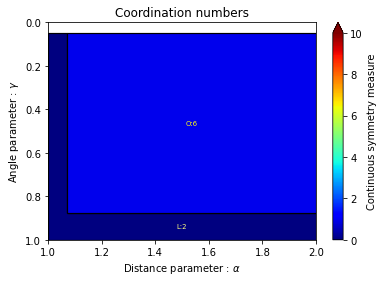

In [107]:
# dir(se)
se.get_environments_figure(isite=1)

In [108]:
# dir(se)
# print(se.get_csm_and_maps())
# print(se.get_coordination_environments())

In [109]:
lse.coordination_environments

[[{'ce_symbol': 'O:6',
   'ce_fraction': 1.0,
   'csm': 0.9534382475403018,
   'permutation': [0, 5, 3, 1, 4, 2]}],
 [{'ce_symbol': 'O:6',
   'ce_fraction': 1.0,
   'csm': 0.9534382475403043,
   'permutation': [2, 3, 5, 1, 0, 4]}],
 [{'ce_symbol': 'T:4',
   'ce_fraction': 1.0,
   'csm': 0.10466558927296984,
   'permutation': [0, 1, 2, 3]}],
 [{'ce_symbol': 'T:4',
   'ce_fraction': 1.0,
   'csm': 0.10466558927296932,
   'permutation': [0, 1, 2, 3]}],
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [6]:
def crysFeaturizer(SC_object):
    struct = SC_object.light_structure_environments.structure 
    nodes=SC_object.environment_subgraph().nodes()
    structure_data = {}
    for node in nodes:
        distances=[]
        node_angleS = []

        node_data = {}
        node_data['element']=node.atom_symbol

        for edge in SC_object.environment_subgraph().edges(node, data=True):


            distance=struct[edge[2]["start"]].distance(struct[edge[2]["end"]], edge[2]["delta"])
            start_element = struct[edge[2]["start"]].species_string
            end_element = struct[edge[2]["end"]].species_string

            if node.atom_symbol!= end_element: #can't see an order on which side edge starts.
                neighbor_element = end_element
            else:
                neighbor_element = start_element  #this way if the 2 elements are different, the other name is saved.

            distance = [distance, neighbor_element]

            distances.append(distance)

            ligandS = edge[2]["ligands"]

            connectivity = {}
            if len(ligandS) == 1:
                connectivity['kind'] = "corner"
            elif len(ligandS) == 2:
                connectivity['kind'] = "edge"
            elif len(ligandS) >= 3:
                connectivity['kind'] = "face"

            edge_angleS = []
            edge_angleS.append(connectivity)
            for ligand in ligandS:
                pos0=struct[ligand[1]["start"]].frac_coords
                pos1=struct[ligand[1]["end"]].frac_coords+ligand[1]["delta"]
                cart_pos0 = struct.lattice.get_cartesian_coords(pos0)
                cart_pos1 = struct.lattice.get_cartesian_coords(pos1)

                pos2=struct[ligand[2]["start"]].frac_coords
                pos3=struct[ligand[2]["end"]].frac_coords+ligand[2]["delta"]
                cart_pos2 = struct.lattice.get_cartesian_coords(pos2)
                cart_pos3 = struct.lattice.get_cartesian_coords(pos3)

                angle = get_angle(cart_pos0-cart_pos1, cart_pos2-cart_pos3, units="degrees")
                edge_angleS.append(angle)

            node_angleS.append(edge_angleS)

        node_data['poly_distances']=distances 


        node_data['connectivity_angles']=node_angleS

        structure_data[node.isite] = node_data
        
    return structure_data

In [7]:
crysFeaturizer(sc)

{0: {'element': 'Mg',
  'poly_distances': [[3.0239465, 'Mg'],
   [3.0239465, 'Mg'],
   [3.2373464466079436, 'Mg'],
   [3.6789738704113435, 'Mg'],
   [3.6260821739269256, 'Mg'],
   [3.237346446607944, 'Mg'],
   [3.6260821739269247, 'Mg'],
   [3.6789738704113426, 'Mg'],
   [2.721421816327089, 'Si'],
   [3.2895732954651185, 'Si'],
   [3.289573295465119, 'Si'],
   [2.721421816327089, 'Si']],
  'connectivity_angles': [[{'kind': 'edge'},
    91.63548278242222,
    92.66875899302363],
   [{'kind': 'edge'}, 92.66875899302363, 91.63548278242223],
   [{'kind': 'edge'}, 97.36517140525531, 95.06765502919026],
   [{'kind': 'corner'}, 124.29669463269823],
   [{'kind': 'corner'}, 117.35470836837644],
   [{'kind': 'edge'}, 95.06765502919023, 97.36517140525532],
   [{'kind': 'corner'}, 117.3547083683764],
   [{'kind': 'corner'}, 124.29669463269826],
   [{'kind': 'edge'}, 90.21291506695404, 91.90668735149006],
   [{'kind': 'corner'}, 122.59244186105776],
   [{'kind': 'corner'}, 122.59244186105775],
   [

In [8]:
playData = np.load('coordPlayData.npy',allow_pickle=True)

# playData = playData[:5] #just to make testing faster

In [9]:
%%time
res= []
cf= ConnectivityFinder()
for datum in playData:
    try:
        lse = datum['lightStructureEnv']
    except:
        continue
    sc1=cf.get_structure_connectivity(light_structure_environments=lse)
    res.append(crysFeaturizer(sc1))#, report_atoms=True)
    
res = np.array(res)


CPU times: user 2.18 s, sys: 7.55 ms, total: 2.18 s
Wall time: 2.19 s


In [10]:
res.shape

(98,)

In [11]:
res[-1]

{0: {'element': 'Li',
  'poly_distances': [[4.396757, 'Li'],
   [2.8194091494788345, 'Li'],
   [2.819409149478835, 'Li'],
   [3.0850935404848854, 'Li'],
   [2.6517493922482682, 'Li'],
   [3.3659671276532794, 'Li'],
   [3.3659671276532785, 'Li'],
   [2.6413368864665188, 'B'],
   [2.910462167377436, 'B'],
   [3.0656847124239444, 'B'],
   [2.936610189072806, 'B'],
   [2.862567015639716, 'B']],
  'connectivity_angles': [[{'kind': 'corner'}, 157.71237237042305],
   [{'kind': 'edge'}, 77.08028332172397, 90.26027309099827],
   [{'kind': 'edge'}, 90.26027309099827, 77.080283321724],
   [{'kind': 'edge'}, 85.69511364059746, 85.69511364059744],
   [{'kind': 'edge'}, 82.92526962906022, 82.9252696290602],
   [{'kind': 'corner'}, 114.34580883987931],
   [{'kind': 'corner'}, 114.3458088398793],
   [{'kind': 'edge'}, 81.24353349057843, 99.38091296458367],
   [{'kind': 'corner'}, 120.99453121687908],
   [{'kind': 'corner'}, 127.06929545159915],
   [{'kind': 'corner'}, 122.88096901234188],
   [{'kind':